# 配套实验一
## 实验要求
在《西瓜书》的习题4.3中这样写道：试编程实现基于信息熵进行划分选择的决策树算法， 并为表4.3中的数据生成一棵决策树。数据集已经放到data文件夹中，我们这里借助sklearn实现基于信息熵的决策树，并将其绘制。

## 参考答案
### 加载数据

In [40]:
import pandas as pd
data_path = r'../data/watermelon.csv'
df_watermelon = pd.read_csv(data_path, index_col=0)

df_watermelon

,色泽,根蒂,敲声,纹理,脐部,触感,密度,含糖率,好瓜
编号,,,,,,,,,
1,青绿,蜷缩,浊响,清晰,凹陷,硬滑,0.697,0.460,是
2,乌黑,蜷缩,沉闷,清晰,凹陷,硬滑,0.774,0.376,是
3,乌黑,蜷缩,浊响,清晰,凹陷,硬滑,0.634,0.264,是
4,青绿,蜷缩,沉闷,清晰,凹陷,硬滑,0.608,0.318,是
5,浅白,蜷缩,浊响,清晰,凹陷,硬滑,0.556,0.215,是
6,青绿,稍蜷,浊响,清晰,稍凹,软粘,0.403,0.237,是
7,乌黑,稍蜷,浊响,稍糊,稍凹,软粘,0.481,0.149,是
8,乌黑,稍蜷,浊响,清晰,稍凹,硬滑,0.437,0.211,是
9,乌黑,稍蜷,沉闷,稍糊,稍凹,硬滑,0.666,0.091,否


In [51]:
df_watermelon.columns

Index(['色泽', '根蒂', '敲声', '纹理', '脐部', '触感', '密度', '含糖率', '好瓜'], dtype='object')

In [16]:
from sklearn import  preprocessing
enc = preprocessing.OrdinalEncoder()

df_watermelon[['色泽', '根蒂', '敲声', '纹理', '脐部', '触感', '好瓜']] = enc.fit_transform(df_watermelon[['色泽', '根蒂', '敲声', '纹理', '脐部', '触感', '好瓜']].values)

y = df_watermelon['好瓜'].values
x = df_watermelon.drop(['好瓜'], axis=1).values

array(['是', '是', '是', '是', '是', '是', '是', '是', '否', '否', '否', '否', '否',
       '否', '否', '否', '否'], dtype=object)

In [62]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf.fit(x, y)

print("Training score:%f"%(clf.score(x,y)))
# print(criterion,"Testing score:%f"%(clf.score(X_test,y_test)))

Training score:1.000000


[Text(133.92000000000002, 195.696, 'X[7] <= 0.126\nentropy = 0.998\nsamples = 17\nvalue = [9, 8]'),
 Text(66.96000000000001, 152.208, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(200.88000000000002, 152.208, 'X[1] <= 1.5\nentropy = 0.918\nsamples = 12\nvalue = [4, 8]'),
 Text(133.92000000000002, 108.72, 'X[4] <= 1.5\nentropy = 0.985\nsamples = 7\nvalue = [4, 3]'),
 Text(66.96000000000001, 65.232, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(200.88000000000002, 65.232, 'X[7] <= 0.304\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(133.92000000000002, 21.744, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(267.84000000000003, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(267.84000000000003, 108.72, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]')]

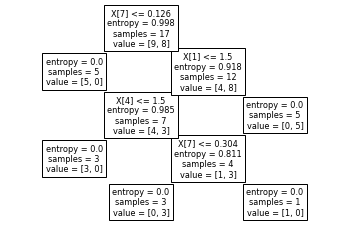

In [63]:
tree.plot_tree(clf)